In [1]:
from google.colab import drive
import os

drive.mount("/content/drive")
os.chdir("drive/MyDrive/traffic-forecasting-GNN")

Mounted at /content/drive


In [2]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.5 MB/s eta 0:00:00


In [97]:
from traffic_data import METRLADatasetLoader
import models as mod
import utils
import torch
import matplotlib.pyplot as plt
from itertools import combinations
import pandas as pd

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [6]:
# get the data loader for the data
# num_timesteps_in=12, num_timesteps_out=1, train_p=0.8, batch_size=256
train_loader, test_loader, train_loader_full, test_loader_full, adj, mean, std = utils.get_data_loaders()

In [7]:
# entrenamiento modelo: GAT + LSTM
model = mod.GATv2_LSTM_Model()
model, lossi, lossi_test, xs, outputs = utils.train_model(model=model,
                                                          device=device,
                                                          num_epochs=30,
                                                          train_loader=train_loader,
                                                          test_loader=test_loader_full,
                                                          adj=adj,
                                                          lr=0.0001)

Epoch [1/30], Loss: 0.2394, Loss test: 0.3289
Epoch [2/30], Loss: 0.2931, Loss test: 0.2899
Epoch [3/30], Loss: 0.1368, Loss test: 0.2682
Epoch [4/30], Loss: 0.1791, Loss test: 0.2579
Epoch [5/30], Loss: 0.1433, Loss test: 0.2511
Epoch [6/30], Loss: 0.1412, Loss test: 0.2432
Epoch [7/30], Loss: 0.1006, Loss test: 0.2398
Epoch [8/30], Loss: 0.1497, Loss test: 0.2354
Epoch [9/30], Loss: 0.1551, Loss test: 0.2312
Epoch [10/30], Loss: 0.0983, Loss test: 0.2279
Epoch [11/30], Loss: 0.1426, Loss test: 0.2260
Epoch [12/30], Loss: 0.0888, Loss test: 0.2238
Epoch [13/30], Loss: 0.0822, Loss test: 0.2247
Se detectó sobreajuste: Early Stopping!!!
Última época de entrenamiento: 13


In [8]:
# guardar resultados
torch.save(model, "trained_models/gat_lstm.pt")
torch.save(outputs, "trained_models/gat_lstm_outputs.pt")
lossi_gat_lstm = lossi
lossi_test_gat_lstm = lossi_test
xs_gat_lstm = xs

In [9]:
# entrenamiento modelo: GAT + GRU
model = mod.GATv2_GRU_Model()
model, lossi, lossi_test, xs, outputs = utils.train_model(model=model,
                                                          device=device,
                                                          num_epochs=30,
                                                          train_loader=train_loader,
                                                          test_loader=test_loader_full,
                                                          adj=adj,
                                                          lr=0.0001)

Epoch [1/30], Loss: 0.2759, Loss test: 0.3044
Epoch [2/30], Loss: 0.1901, Loss test: 0.2746
Epoch [3/30], Loss: 0.2328, Loss test: 0.2547
Epoch [4/30], Loss: 0.1082, Loss test: 0.2379
Epoch [5/30], Loss: 0.1335, Loss test: 0.2309
Epoch [6/30], Loss: 0.1689, Loss test: 0.2222
Epoch [7/30], Loss: 0.1622, Loss test: 0.2168
Epoch [8/30], Loss: 0.0830, Loss test: 0.2118
Epoch [9/30], Loss: 0.1074, Loss test: 0.2085
Epoch [10/30], Loss: 0.0811, Loss test: 0.2031
Epoch [11/30], Loss: 0.1221, Loss test: 0.2030
Epoch [12/30], Loss: 0.0748, Loss test: 0.1994
Epoch [13/30], Loss: 0.1436, Loss test: 0.1968
Epoch [14/30], Loss: 0.1400, Loss test: 0.1947
Epoch [15/30], Loss: 0.1566, Loss test: 0.1931
Epoch [16/30], Loss: 0.1479, Loss test: 0.1987
Se detectó sobreajuste: Early Stopping!!!
Última época de entrenamiento: 16


In [10]:
# guardar resultados
torch.save(model, "trained_models/gat_gru.pt")
torch.save(outputs, "trained_models/gat_gru_outputs.pt")
lossi_gat_gru = lossi
lossi_test_gat_gru = lossi_test
xs_gat_gru = xs

In [11]:
# entrenamiento modelo: GCN + LSTM
model = mod.GCN_LSTM_Model()
model, lossi, lossi_test, xs, outputs = utils.train_model(model=model,
                                                          device=device,
                                                          num_epochs=30,
                                                          train_loader=train_loader,
                                                          test_loader=test_loader_full,
                                                          adj=adj,
                                                          lr=0.0001)

Epoch [1/30], Loss: 0.2335, Loss test: 0.3277
Epoch [2/30], Loss: 0.1401, Loss test: 0.2765
Epoch [3/30], Loss: 0.2709, Loss test: 0.2555
Epoch [4/30], Loss: 0.2150, Loss test: 0.2424
Epoch [5/30], Loss: 0.1436, Loss test: 0.2338
Epoch [6/30], Loss: 0.1142, Loss test: 0.2282
Epoch [7/30], Loss: 0.1283, Loss test: 0.2222
Epoch [8/30], Loss: 0.1026, Loss test: 0.2172
Epoch [9/30], Loss: 0.2021, Loss test: 0.2154
Epoch [10/30], Loss: 0.1125, Loss test: 0.2140
Epoch [11/30], Loss: 0.0910, Loss test: 0.2129
Epoch [12/30], Loss: 0.0738, Loss test: 0.2124
Epoch [13/30], Loss: 0.0722, Loss test: 0.2113
Epoch [14/30], Loss: 0.1021, Loss test: 0.2136
Se detectó sobreajuste: Early Stopping!!!
Última época de entrenamiento: 14


In [12]:
# guardar resultados
torch.save(model, "trained_models/gcn_lstm.pt")
torch.save(outputs, "trained_models/gcn_lstm_outputs.pt")
lossi_gcn_lstm = lossi
lossi_test_gcn_lstm = lossi_test
xs_gcn_lstm = xs

In [13]:
# entrenamiento modelo: GCN + GRU
model = mod.GCN_GRU_Model()
model, lossi, lossi_test, xs, outputs = utils.train_model(model=model,
                                                          device=device,
                                                          num_epochs=30,
                                                          train_loader=train_loader,
                                                          test_loader=test_loader_full,
                                                          adj=adj,
                                                          lr=0.0001)

Epoch [1/30], Loss: 0.2490, Loss test: 0.3052
Epoch [2/30], Loss: 0.1893, Loss test: 0.2731
Epoch [3/30], Loss: 0.1299, Loss test: 0.2537
Epoch [4/30], Loss: 0.1315, Loss test: 0.2402
Epoch [5/30], Loss: 0.1763, Loss test: 0.2302
Epoch [6/30], Loss: 0.1635, Loss test: 0.2230
Epoch [7/30], Loss: 0.0902, Loss test: 0.2153
Epoch [8/30], Loss: 0.0991, Loss test: 0.2109
Epoch [9/30], Loss: 0.1050, Loss test: 0.2060
Epoch [10/30], Loss: 0.1814, Loss test: 0.2013
Epoch [11/30], Loss: 0.0920, Loss test: 0.1979
Epoch [12/30], Loss: 0.2053, Loss test: 0.1958
Epoch [13/30], Loss: 0.1100, Loss test: 0.1931
Epoch [14/30], Loss: 0.1236, Loss test: 0.1905
Epoch [15/30], Loss: 0.0897, Loss test: 0.1902
Epoch [16/30], Loss: 0.0992, Loss test: 0.1911
Se detectó sobreajuste: Early Stopping!!!
Última época de entrenamiento: 16


In [14]:
# guardar resultados
torch.save(model, "trained_models/gcn_gru.pt")
torch.save(outputs, "trained_models/gcn_gru_outputs.pt")
lossi_gcn_gru = lossi
lossi_test_gcn_gru = lossi_test
xs_gcn_gru = xs

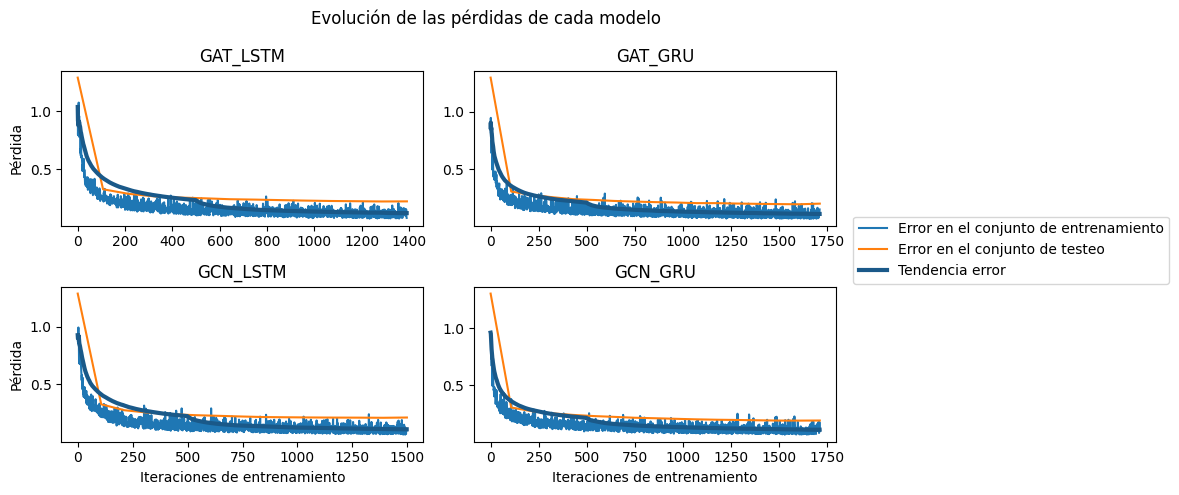

In [15]:
# Crear una figura y una matriz de subgráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

# Lista de datos y títulos para iterar
modelos = [
    (lossi_gat_lstm, lossi_test_gat_lstm, xs_gat_lstm, "GAT_LSTM"),
    (lossi_gat_gru, lossi_test_gat_gru, xs_gat_gru, "GAT_GRU"),
    (lossi_gcn_lstm, lossi_test_gcn_lstm, xs_gcn_lstm, "GCN_LSTM"),
    (lossi_gcn_gru, lossi_test_gcn_gru, xs_gcn_gru, "GCN_GRU")
]

# Lista para almacenar las líneas de los gráficos para la leyenda
lines = []
labels = []

# Iterar sobre los subgráficos y los datos
for i, (ax, (lossi, lossi_test, xs, title)) in enumerate(zip(axs.flat, modelos)):
    line1, = ax.plot(lossi, label="Error en el conjunto de entrenamiento")
    line2, = ax.plot(xs, lossi_test, label="Error en el conjunto de testeo")
    line3, = ax.plot(utils.moving_average(lossi), label="Tendencia error", lw=3, c='#1a5989')
    ax.set_title(title)

    # Condición para asignar etiquetas de los ejes
    if i // 2 == 1:  # Filas inferiores (índices 2 y 3)
        ax.set_xlabel('Iteraciones de entrenamiento')
    if i % 2 == 0:  # Columnas izquierdas (índices 0 y 2)
        ax.set_ylabel('Pérdida')

    # Solo agregar las líneas y etiquetas una vez
    if not lines:
        lines.extend([line1, line2, line3])
        labels.extend([line1.get_label(), line2.get_label(), line3.get_label()])

# Escribir titulo
fig.suptitle("Evolución de las pérdidas de cada modelo")

# Ajustar el layout para que no haya superposición de elementos
plt.tight_layout()

# Crear una leyenda global
fig.legend(lines, labels, loc='center left', bbox_to_anchor=(0.86, 0.5))

# Ajustar los márgenes para hacer espacio para la leyenda a la derecha
plt.subplots_adjust(right=0.85)

# Mostrar la figura completa con los 4 subgráficos
plt.show()

In [16]:
# Ensambles

In [17]:
# Promedio de los modelos

In [18]:
outputs_gat_lstm = torch.load("trained_models/gat_lstm_outputs.pt")
outputs_gat_gru = torch.load("trained_models/gat_gru_outputs.pt")
outputs_gcn_lstm = torch.load("trained_models/gcn_lstm_outputs.pt")
outputs_gcn_gru = torch.load("trained_models/gcn_gru_outputs.pt")

In [19]:
outputs_gat_lstm.shape

torch.Size([6852, 207, 1])

In [20]:
X_test, Y_test = next(iter(test_loader_full))
criterion = torch.nn.MSELoss()
Y_test = Y_test.to(device)
print(X_test.shape)
print(Y_test.shape)

torch.Size([6852, 12, 207, 1])
torch.Size([6852, 207, 1])


In [21]:
def generar_combinaciones(lista):
    combinaciones = []
    for i in range(1, len(lista) + 1):
        combinaciones.extend(combinations(lista, i))
    return combinaciones

outputs_dict = {
    'GAT + LSTM': outputs_gat_lstm,
    'GCN + LSTM': outputs_gcn_lstm,
    'GAT + GRU': outputs_gat_gru,
    'GCN + GRU': outputs_gcn_gru
}

lista = ['GAT + LSTM', 'GCN + LSTM', 'GAT + GRU', 'GCN + GRU']
combinaciones = generar_combinaciones(lista)

In [22]:
res = {
    'Modelos': [],
    'Test loss': []
}

for combinacion in combinaciones:
    full_predicciones = outputs_dict[combinacion[0]]
    for nombre_modelo in combinacion[1:]:
        full_predicciones = torch.cat((full_predicciones, outputs_dict[nombre_modelo]), dim=2)
    output_ensamble_media = torch.mean(full_predicciones, dim=2, keepdim=True)
    test_loss = criterion(output_ensamble_media, Y_test).item()
    res['Modelos'].append(combinacion)
    res['Test loss'].append(test_loss)

In [23]:
df = pd.DataFrame(res)
df.sort_values("Test loss")

,Modelos,Test loss
12,"(GAT + LSTM, GAT + GRU, GCN + GRU)",0.187708
9,"(GAT + GRU, GCN + GRU)",0.188496
14,"(GAT + LSTM, GCN + LSTM, GAT + GRU, GCN + GRU)",0.189863
13,"(GCN + LSTM, GAT + GRU, GCN + GRU)",0.190104
3,"(GCN + GRU,)",0.191063
5,"(GAT + LSTM, GAT + GRU)",0.192425
10,"(GAT + LSTM, GCN + LSTM, GAT + GRU)",0.193703
8,"(GCN + LSTM, GCN + GRU)",0.194860
6,"(GAT + LSTM, GCN + GRU)",0.195033
7,"(GCN + LSTM, GAT + GRU)",0.195210


In [24]:
# Boosting

In [25]:
adj = adj.to(device)

In [26]:
# Ajustar errores del modelo GAT + LSTM

In [27]:
model = torch.load("trained_models/gat_lstm.pt")
resultados_test = torch.load("trained_models/gat_lstm_outputs.pt")

model.eval()
resultados_train = []
valores_reales = []
with torch.no_grad():
  for X_batch, Y_batch in train_loader_full:
    X_batch , Y_batch = X_batch.to(device), Y_batch.to(device)
    outputs = model(X_batch, adj)
    valores_reales.append(Y_batch)
    resultados_train.append(outputs)

resultados_train = torch.cat(resultados_train, dim=0)
Y_train = torch.cat(valores_reales, dim=0)

# obtenemos los errores del modelo tanto en train como en test
errores_train = Y_train - resultados_train
errores_test = Y_test - resultados_test

In [28]:
torch.save(resultados_train, "trained_models/gat_lstm_outputs_train.pt")
torch.save(errores_train, "trained_models/gat_lstm_errores_train.pt")
torch.save(errores_test, "trained_models/gat_lstm_errores_test.pt")

In [29]:
# cargamos los data loaders para ajustar los modelos a los errores
train_loader_errores, _, _, test_loader_full_errores, _, _, _ = utils.get_data_loaders(Y_train=errores_train,
                                                                                       Y_test=errores_test)

In [30]:
# entrenamiento modelo ajustar errores de GAT + LSTM con: GAT + LSTM
model = mod.GATv2_LSTM_Model()
model, lossi, lossi_test, xs, outputs = utils.train_model(model=model,
                                                          device=device,
                                                          num_epochs=30,
                                                          train_loader=train_loader_errores,
                                                          test_loader=test_loader_full_errores,
                                                          adj=adj,
                                                          lr=0.0001)

Epoch [1/30], Loss: 0.2011, Loss test: 0.2210
Epoch [2/30], Loss: 0.0867, Loss test: 0.2199
Epoch [3/30], Loss: 0.1329, Loss test: 0.2187
Epoch [4/30], Loss: 0.0796, Loss test: 0.2172
Epoch [5/30], Loss: 0.1345, Loss test: 0.2161
Epoch [6/30], Loss: 0.0776, Loss test: 0.2147
Epoch [7/30], Loss: 0.1041, Loss test: 0.2119
Epoch [8/30], Loss: 0.1250, Loss test: 0.2106
Epoch [9/30], Loss: 0.0896, Loss test: 0.2101
Epoch [10/30], Loss: 0.0968, Loss test: 0.2100
Epoch [11/30], Loss: 0.0812, Loss test: 0.2065
Epoch [12/30], Loss: 0.0722, Loss test: 0.2098
Se detectó sobreajuste: Early Stopping!!!
Última época de entrenamiento: 12


In [31]:
# guardar resultados
torch.save(model, "trained_models_errors/errors_gat_lstm/gat_lstm.pt")
torch.save(outputs, "trained_models_errors/errors_gat_lstm/gat_lstm_outputs.pt") # errores ajustados por el modelo
errors_gat_lstm_lossi_gat_lstm = lossi
errors_gat_lstm_lossi_test_gat_lstm = lossi_test
errors_gat_lstm_xs_gat_lstm = xs

In [32]:
# entrenamiento modelo ajustar errores de GAT + LSTM con: GAT + GRU
model = mod.GATv2_GRU_Model()
model, lossi, lossi_test, xs, outputs = utils.train_model(model=model,
                                                          device=device,
                                                          num_epochs=30,
                                                          train_loader=train_loader_errores,
                                                          test_loader=test_loader_full_errores,
                                                          adj=adj,
                                                          lr=0.0001)

Epoch [1/30], Loss: 0.1125, Loss test: 0.2213
Epoch [2/30], Loss: 0.1091, Loss test: 0.2202
Epoch [3/30], Loss: 0.1152, Loss test: 0.2181
Epoch [4/30], Loss: 0.0778, Loss test: 0.2157
Epoch [5/30], Loss: 0.0711, Loss test: 0.2130
Epoch [6/30], Loss: 0.0739, Loss test: 0.2110
Epoch [7/30], Loss: 0.1523, Loss test: 0.2085
Epoch [8/30], Loss: 0.1089, Loss test: 0.2069
Epoch [9/30], Loss: 0.0716, Loss test: 0.2044
Epoch [10/30], Loss: 0.0709, Loss test: 0.2020
Epoch [11/30], Loss: 0.0681, Loss test: 0.2001
Epoch [12/30], Loss: 0.1441, Loss test: 0.1979
Epoch [13/30], Loss: 0.0693, Loss test: 0.1968
Epoch [14/30], Loss: 0.1292, Loss test: 0.1961
Epoch [15/30], Loss: 0.0969, Loss test: 0.1938
Epoch [16/30], Loss: 0.0593, Loss test: 0.1931
Epoch [17/30], Loss: 0.1010, Loss test: 0.1918
Epoch [18/30], Loss: 0.0632, Loss test: 0.1902
Epoch [19/30], Loss: 0.0705, Loss test: 0.1903
Se detectó sobreajuste: Early Stopping!!!
Última época de entrenamiento: 19


In [33]:
# guardar resultados
torch.save(model, "trained_models_errors/errors_gat_lstm/gat_gru.pt")
torch.save(outputs, "trained_models_errors/errors_gat_lstm/gat_gru_outputs.pt") # errores ajustados por el modelo
errors_gat_lstm_lossi_gat_gru = lossi
errors_gat_lstm_lossi_test_gat_gru = lossi_test
errors_gat_lstm_xs_gat_gru = xs

In [34]:
# entrenamiento modelo ajustar errores de GAT + LSTM con: GCN + LSTM
model = mod.GCN_LSTM_Model()
model, lossi, lossi_test, xs, outputs = utils.train_model(model=model,
                                                          device=device,
                                                          num_epochs=30,
                                                          train_loader=train_loader_errores,
                                                          test_loader=test_loader_full_errores,
                                                          adj=adj,
                                                          lr=0.0001)

Epoch [1/30], Loss: 0.0810, Loss test: 0.2207
Epoch [2/30], Loss: 0.1108, Loss test: 0.2186
Epoch [3/30], Loss: 0.0731, Loss test: 0.2163
Epoch [4/30], Loss: 0.1111, Loss test: 0.2137
Epoch [5/30], Loss: 0.0807, Loss test: 0.2117
Epoch [6/30], Loss: 0.0972, Loss test: 0.2106
Epoch [7/30], Loss: 0.0706, Loss test: 0.2066
Epoch [8/30], Loss: 0.0670, Loss test: 0.2046
Epoch [9/30], Loss: 0.0983, Loss test: 0.2056
Se detectó sobreajuste: Early Stopping!!!
Última época de entrenamiento: 9


In [35]:
# guardar resultados
torch.save(model, "trained_models_errors/errors_gat_lstm/gcn_lstm.pt")
torch.save(outputs, "trained_models_errors/errors_gat_lstm/gcn_lstm_outputs.pt") # errores ajustados por el modelo
errors_gat_lstm_lossi_gcn_lstm = lossi
errors_gat_lstm_lossi_test_gcn_lstm = lossi_test
errors_gat_lstm_xs_gcn_lstm = xs

In [36]:
# entrenamiento modelo ajustar errores de GAT + LSTM con: GCN + GRU
model = mod.GCN_GRU_Model()
model, lossi, lossi_test, xs, outputs = utils.train_model(model=model,
                                                          device=device,
                                                          num_epochs=30,
                                                          train_loader=train_loader_errores,
                                                          test_loader=test_loader_full_errores,
                                                          adj=adj,
                                                          lr=0.0001)

Epoch [1/30], Loss: 0.1191, Loss test: 0.2186
Epoch [2/30], Loss: 0.0850, Loss test: 0.2153
Epoch [3/30], Loss: 0.1943, Loss test: 0.2103
Epoch [4/30], Loss: 0.1962, Loss test: 0.2061
Epoch [5/30], Loss: 0.1408, Loss test: 0.2026
Epoch [6/30], Loss: 0.0659, Loss test: 0.1976
Epoch [7/30], Loss: 0.0853, Loss test: 0.1948
Epoch [8/30], Loss: 0.1338, Loss test: 0.1929
Epoch [9/30], Loss: 0.1210, Loss test: 0.1911
Epoch [10/30], Loss: 0.0683, Loss test: 0.1889
Epoch [11/30], Loss: 0.0569, Loss test: 0.1863
Epoch [12/30], Loss: 0.1290, Loss test: 0.1857
Epoch [13/30], Loss: 0.1017, Loss test: 0.1849
Epoch [14/30], Loss: 0.1074, Loss test: 0.1826
Epoch [15/30], Loss: 0.1173, Loss test: 0.1831
Se detectó sobreajuste: Early Stopping!!!
Última época de entrenamiento: 15


In [37]:
# guardar resultados
torch.save(model, "trained_models_errors/errors_gat_lstm/gcn_gru.pt")
torch.save(outputs, "trained_models_errors/errors_gat_lstm/gcn_gru_outputs.pt") # errores ajustados por el modelo
errors_gat_lstm_lossi_gcn_gru = lossi
errors_gat_lstm_lossi_test_gcn_gru = lossi_test
errors_gat_lstm_xs_gcn_gru = xs

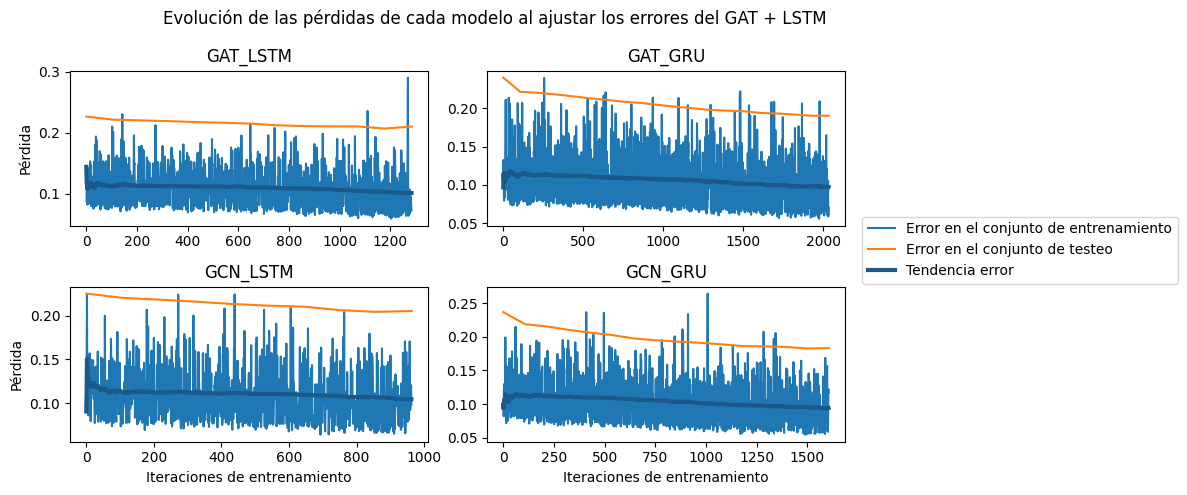

In [38]:
# Crear una figura y una matriz de subgráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

# Lista de datos y títulos para iterar
modelos = [
    (errors_gat_lstm_lossi_gat_lstm, errors_gat_lstm_lossi_test_gat_lstm, errors_gat_lstm_xs_gat_lstm, "GAT_LSTM"),
    (errors_gat_lstm_lossi_gat_gru, errors_gat_lstm_lossi_test_gat_gru, errors_gat_lstm_xs_gat_gru, "GAT_GRU"),
    (errors_gat_lstm_lossi_gcn_lstm, errors_gat_lstm_lossi_test_gcn_lstm, errors_gat_lstm_xs_gcn_lstm, "GCN_LSTM"),
    (errors_gat_lstm_lossi_gcn_gru, errors_gat_lstm_lossi_test_gcn_gru, errors_gat_lstm_xs_gcn_gru, "GCN_GRU")
]

# Lista para almacenar las líneas de los gráficos para la leyenda
lines = []
labels = []

# Iterar sobre los subgráficos y los datos
for i, (ax, (lossi, lossi_test, xs, title)) in enumerate(zip(axs.flat, modelos)):
    line1, = ax.plot(lossi, label="Error en el conjunto de entrenamiento")
    line2, = ax.plot(xs, lossi_test, label="Error en el conjunto de testeo")
    line3, = ax.plot(utils.moving_average(lossi), label="Tendencia error", lw=3, c='#1a5989')
    ax.set_title(title)

    # Condición para asignar etiquetas de los ejes
    if i // 2 == 1:  # Filas inferiores (índices 2 y 3)
        ax.set_xlabel('Iteraciones de entrenamiento')
    if i % 2 == 0:  # Columnas izquierdas (índices 0 y 2)
        ax.set_ylabel('Pérdida')

    # Solo agregar las líneas y etiquetas una vez
    if not lines:
        lines.extend([line1, line2, line3])
        labels.extend([line1.get_label(), line2.get_label(), line3.get_label()])

# Escribir titulo
fig.suptitle("Evolución de las pérdidas de cada modelo al ajustar los errores del GAT + LSTM")

# Ajustar el layout para que no haya superposición de elementos
plt.tight_layout()

# Crear una leyenda global
fig.legend(lines, labels, loc='center left', bbox_to_anchor=(0.86, 0.5))

# Ajustar los márgenes para hacer espacio para la leyenda a la derecha
plt.subplots_adjust(right=0.85)

# Mostrar la figura completa con los 4 subgráficos
plt.show()

In [39]:
# Ajustar errores del modelo GAT + GRU

In [40]:
model = torch.load("trained_models/gat_gru.pt")
resultados_test = torch.load("trained_models/gat_gru_outputs.pt")

model.eval()
resultados_train = []
valores_reales = []
with torch.no_grad():
  for X_batch, Y_batch in train_loader_full:
    X_batch , Y_batch = X_batch.to(device), Y_batch.to(device)
    outputs = model(X_batch, adj)
    valores_reales.append(Y_batch)
    resultados_train.append(outputs)

resultados_train = torch.cat(resultados_train, dim=0)
Y_train = torch.cat(valores_reales, dim=0)

# obtenemos los errores del modelo tanto en train como en test
errores_train = Y_train - resultados_train
errores_test = Y_test - resultados_test

In [41]:
torch.save(resultados_train, "trained_models/gat_gru_outputs_train.pt")
torch.save(errores_train, "trained_models/gat_gru_errores_train.pt")
torch.save(errores_test, "trained_models/gat_gru_errores_test.pt")

In [42]:
# cargamos los data loaders para ajustar los modelos a los errores
train_loader_errores, _, _, test_loader_full_errores, _, _, _ = utils.get_data_loaders(Y_train=errores_train,
                                                                                       Y_test=errores_test)

In [43]:
# entrenamiento modelo ajustar errores de GAT + GRU con: GAT + LSTM
model = mod.GATv2_LSTM_Model()
model, lossi, lossi_test, xs, outputs = utils.train_model(model=model,
                                                          device=device,
                                                          num_epochs=30,
                                                          train_loader=train_loader_errores,
                                                          test_loader=test_loader_full_errores,
                                                          adj=adj,
                                                          lr=0.0001)

Epoch [1/30], Loss: 0.0809, Loss test: 0.1957
Epoch [2/30], Loss: 0.0876, Loss test: 0.1954
Epoch [3/30], Loss: 0.1273, Loss test: 0.1940
Epoch [4/30], Loss: 0.1170, Loss test: 0.1931
Epoch [5/30], Loss: 0.0709, Loss test: 0.1920
Epoch [6/30], Loss: 0.0691, Loss test: 0.1918
Epoch [7/30], Loss: 0.1023, Loss test: 0.1917
Epoch [8/30], Loss: 0.0725, Loss test: 0.1913
Epoch [9/30], Loss: 0.1188, Loss test: 0.1922
Se detectó sobreajuste: Early Stopping!!!
Última época de entrenamiento: 9


In [44]:
# guardar resultados
torch.save(model, "trained_models_errors/errors_gat_gru/gat_lstm.pt")
torch.save(outputs, "trained_models_errors/errors_gat_gru/gat_lstm_outputs.pt") # errores ajustados por el modelo
errors_gat_gru_lossi_gat_lstm = lossi
errors_gat_gru_lossi_test_gat_lstm = lossi_test
errors_gat_gru_xs_gat_lstm = xs

In [45]:
# entrenamiento modelo ajustar errores de GAT + GRU con: GAT + GRU
model = mod.GATv2_GRU_Model()
model, lossi, lossi_test, xs, outputs = utils.train_model(model=model,
                                                          device=device,
                                                          num_epochs=30,
                                                          train_loader=train_loader_errores,
                                                          test_loader=test_loader_full_errores,
                                                          adj=adj,
                                                          lr=0.0001)

Epoch [1/30], Loss: 0.2210, Loss test: 0.1969
Epoch [2/30], Loss: 0.0689, Loss test: 0.1957
Epoch [3/30], Loss: 0.0668, Loss test: 0.1958
Se detectó sobreajuste: Early Stopping!!!
Última época de entrenamiento: 3


In [46]:
# guardar resultados
torch.save(model, "trained_models_errors/errors_gat_gru/gat_gru.pt")
torch.save(outputs, "trained_models_errors/errors_gat_gru/gat_gru_outputs.pt") # errores ajustados por el modelo
errors_gat_gru_lossi_gat_gru = lossi
errors_gat_gru_lossi_test_gat_gru = lossi_test
errors_gat_gru_xs_gat_gru = xs

In [47]:
# entrenamiento modelo ajustar errores de GAT + GRU con: GCN + LSTM
model = mod.GCN_LSTM_Model()
model, lossi, lossi_test, xs, outputs = utils.train_model(model=model,
                                                          device=device,
                                                          num_epochs=30,
                                                          train_loader=train_loader_errores,
                                                          test_loader=test_loader_full_errores,
                                                          adj=adj,
                                                          lr=0.0001)

Epoch [1/30], Loss: 0.0797, Loss test: 0.1955
Epoch [2/30], Loss: 0.1335, Loss test: 0.1945
Epoch [3/30], Loss: 0.1162, Loss test: 0.1936
Epoch [4/30], Loss: 0.1876, Loss test: 0.1919
Epoch [5/30], Loss: 0.0692, Loss test: 0.1905
Epoch [6/30], Loss: 0.0870, Loss test: 0.1908
Se detectó sobreajuste: Early Stopping!!!
Última época de entrenamiento: 6


In [48]:
# guardar resultados
torch.save(model, "trained_models_errors/errors_gat_gru/gcn_lstm.pt")
torch.save(outputs, "trained_models_errors/errors_gat_gru/gcn_lstm_outputs.pt") # errores ajustados por el modelo
errors_gat_gru_lossi_gcn_lstm = lossi
errors_gat_gru_lossi_test_gcn_lstm = lossi_test
errors_gat_gru_xs_gcn_lstm = xs

In [49]:
# entrenamiento modelo ajustar errores de GAT + GRU con: GCN + GRU
model = mod.GCN_GRU_Model()
model, lossi, lossi_test, xs, outputs = utils.train_model(model=model,
                                                          device=device,
                                                          num_epochs=30,
                                                          train_loader=train_loader_errores,
                                                          test_loader=test_loader_full_errores,
                                                          adj=adj,
                                                          lr=0.0001)

Epoch [1/30], Loss: 0.1279, Loss test: 0.1954
Epoch [2/30], Loss: 0.0772, Loss test: 0.1945
Epoch [3/30], Loss: 0.0672, Loss test: 0.1942
Epoch [4/30], Loss: 0.0846, Loss test: 0.1936
Epoch [5/30], Loss: 0.0681, Loss test: 0.1926
Epoch [6/30], Loss: 0.0661, Loss test: 0.1922
Epoch [7/30], Loss: 0.0787, Loss test: 0.1906
Epoch [8/30], Loss: 0.0830, Loss test: 0.1896
Epoch [9/30], Loss: 0.1008, Loss test: 0.1887
Epoch [10/30], Loss: 0.1029, Loss test: 0.1878
Epoch [11/30], Loss: 0.0834, Loss test: 0.1862
Epoch [12/30], Loss: 0.0741, Loss test: 0.1841
Epoch [13/30], Loss: 0.1484, Loss test: 0.1827
Epoch [14/30], Loss: 0.0696, Loss test: 0.1818
Epoch [15/30], Loss: 0.1719, Loss test: 0.1811
Epoch [16/30], Loss: 0.0761, Loss test: 0.1797
Epoch [17/30], Loss: 0.1077, Loss test: 0.1783
Epoch [18/30], Loss: 0.0576, Loss test: 0.1779
Epoch [19/30], Loss: 0.0638, Loss test: 0.1768
Epoch [20/30], Loss: 0.1020, Loss test: 0.1749
Epoch [21/30], Loss: 0.0999, Loss test: 0.1752
Se detectó sobreajuste

In [50]:
# guardar resultados
torch.save(model, "trained_models_errors/errors_gat_gru/gcn_gru.pt")
torch.save(outputs, "trained_models_errors/errors_gat_gru/gcn_gru_outputs.pt") # errores ajustados por el modelo
errors_gat_gru_lossi_gcn_gru = lossi
errors_gat_gru_lossi_test_gcn_gru = lossi_test
errors_gat_gru_xs_gcn_gru = xs

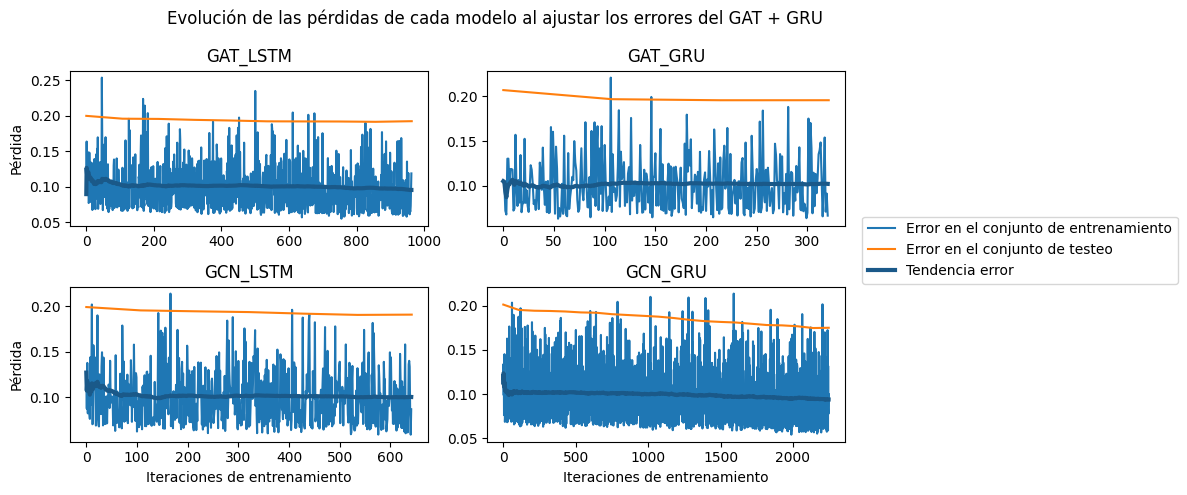

In [51]:
# Crear una figura y una matriz de subgráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

# Lista de datos y títulos para iterar
modelos = [
    (errors_gat_gru_lossi_gat_lstm, errors_gat_gru_lossi_test_gat_lstm, errors_gat_gru_xs_gat_lstm, "GAT_LSTM"),
    (errors_gat_gru_lossi_gat_gru, errors_gat_gru_lossi_test_gat_gru, errors_gat_gru_xs_gat_gru, "GAT_GRU"),
    (errors_gat_gru_lossi_gcn_lstm, errors_gat_gru_lossi_test_gcn_lstm, errors_gat_gru_xs_gcn_lstm, "GCN_LSTM"),
    (errors_gat_gru_lossi_gcn_gru, errors_gat_gru_lossi_test_gcn_gru, errors_gat_gru_xs_gcn_gru, "GCN_GRU")
]

# Lista para almacenar las líneas de los gráficos para la leyenda
lines = []
labels = []

# Iterar sobre los subgráficos y los datos
for i, (ax, (lossi, lossi_test, xs, title)) in enumerate(zip(axs.flat, modelos)):
    line1, = ax.plot(lossi, label="Error en el conjunto de entrenamiento")
    line2, = ax.plot(xs, lossi_test, label="Error en el conjunto de testeo")
    line3, = ax.plot(utils.moving_average(lossi), label="Tendencia error", lw=3, c='#1a5989')
    ax.set_title(title)

    # Condición para asignar etiquetas de los ejes
    if i // 2 == 1:  # Filas inferiores (índices 2 y 3)
        ax.set_xlabel('Iteraciones de entrenamiento')
    if i % 2 == 0:  # Columnas izquierdas (índices 0 y 2)
        ax.set_ylabel('Pérdida')

    # Solo agregar las líneas y etiquetas una vez
    if not lines:
        lines.extend([line1, line2, line3])
        labels.extend([line1.get_label(), line2.get_label(), line3.get_label()])

# Escribir titulo
fig.suptitle("Evolución de las pérdidas de cada modelo al ajustar los errores del GAT + GRU")

# Ajustar el layout para que no haya superposición de elementos
plt.tight_layout()

# Crear una leyenda global
fig.legend(lines, labels, loc='center left', bbox_to_anchor=(0.86, 0.5))

# Ajustar los márgenes para hacer espacio para la leyenda a la derecha
plt.subplots_adjust(right=0.85)

# Mostrar la figura completa con los 4 subgráficos
plt.show()

In [52]:
# Ajustar errores del modelo GCN + LSTM

In [53]:
model = torch.load("trained_models/gcn_lstm.pt")
resultados_test = torch.load("trained_models/gcn_lstm_outputs.pt")

model.eval()
resultados_train = []
valores_reales = []
with torch.no_grad():
  for X_batch, Y_batch in train_loader_full:
    X_batch , Y_batch = X_batch.to(device), Y_batch.to(device)
    outputs = model(X_batch, adj)
    valores_reales.append(Y_batch)
    resultados_train.append(outputs)

resultados_train = torch.cat(resultados_train, dim=0)
Y_train = torch.cat(valores_reales, dim=0)

# obtenemos los errores del modelo tanto en train como en test
errores_train = Y_train - resultados_train
errores_test = Y_test - resultados_test

In [54]:
torch.save(resultados_train, "trained_models/gcn_lstm_outputs_train.pt")
torch.save(errores_train, "trained_models/gcn_lstm_errores_train.pt")
torch.save(errores_test, "trained_models/gcn_lstm_errores_test.pt")

In [55]:
# cargamos los data loaders para ajustar los modelos a los errores
train_loader_errores, _, _, test_loader_full_errores, _, _, _ = utils.get_data_loaders(Y_train=errores_train,
                                                                                       Y_test=errores_test)

In [56]:
# entrenamiento modelo ajustar errores de GCN + LSTM con: GAT + LSTM
model = mod.GATv2_LSTM_Model()
model, lossi, lossi_test, xs, outputs = utils.train_model(model=model,
                                                          device=device,
                                                          num_epochs=30,
                                                          train_loader=train_loader_errores,
                                                          test_loader=test_loader_full_errores,
                                                          adj=adj,
                                                          lr=0.0001)

Epoch [1/30], Loss: 0.1636, Loss test: 0.2114
Epoch [2/30], Loss: 0.0925, Loss test: 0.2109
Epoch [3/30], Loss: 0.1051, Loss test: 0.2097
Epoch [4/30], Loss: 0.0716, Loss test: 0.2087
Epoch [5/30], Loss: 0.0958, Loss test: 0.2067
Epoch [6/30], Loss: 0.1080, Loss test: 0.2049
Epoch [7/30], Loss: 0.0625, Loss test: 0.2038
Epoch [8/30], Loss: 0.1321, Loss test: 0.2035
Epoch [9/30], Loss: 0.0807, Loss test: 0.2043
Se detectó sobreajuste: Early Stopping!!!
Última época de entrenamiento: 9


In [57]:
# guardar resultados
torch.save(model, "trained_models_errors/errors_gcn_lstm/gat_lstm.pt")
torch.save(outputs, "trained_models_errors/errors_gcn_lstm/gat_lstm_outputs.pt") # errores ajustados por el modelo
errors_gcn_lstm_lossi_gat_lstm = lossi
errors_gcn_lstm_lossi_test_gat_lstm = lossi_test
errors_gcn_lstm_xs_gat_lstm = xs

In [58]:
# entrenamiento modelo ajustar errores de GCN + LSTM con: GAT + GRU
model = mod.GATv2_GRU_Model()
model, lossi, lossi_test, xs, outputs = utils.train_model(model=model,
                                                          device=device,
                                                          num_epochs=30,
                                                          train_loader=train_loader_errores,
                                                          test_loader=test_loader_full_errores,
                                                          adj=adj,
                                                          lr=0.0001)

Epoch [1/30], Loss: 0.1075, Loss test: 0.2111
Epoch [2/30], Loss: 0.0921, Loss test: 0.2101
Epoch [3/30], Loss: 0.1103, Loss test: 0.2091
Epoch [4/30], Loss: 0.1131, Loss test: 0.2082
Epoch [5/30], Loss: 0.0923, Loss test: 0.2073
Epoch [6/30], Loss: 0.1088, Loss test: 0.2055
Epoch [7/30], Loss: 0.0746, Loss test: 0.2045
Epoch [8/30], Loss: 0.1390, Loss test: 0.2034
Epoch [9/30], Loss: 0.0623, Loss test: 0.2017
Epoch [10/30], Loss: 0.1038, Loss test: 0.2007
Epoch [11/30], Loss: 0.1688, Loss test: 0.1981
Epoch [12/30], Loss: 0.0618, Loss test: 0.1968
Epoch [13/30], Loss: 0.0757, Loss test: 0.1966
Epoch [14/30], Loss: 0.1063, Loss test: 0.1940
Epoch [15/30], Loss: 0.0659, Loss test: 0.1941
Se detectó sobreajuste: Early Stopping!!!
Última época de entrenamiento: 15


In [59]:
# guardar resultados
torch.save(model, "trained_models_errors/errors_gcn_lstm/gat_gru.pt")
torch.save(outputs, "trained_models_errors/errors_gcn_lstm/gat_gru_outputs.pt") # errores ajustados por el modelo
errors_gcn_lstm_lossi_gat_gru = lossi
errors_gcn_lstm_lossi_test_gat_gru = lossi_test
errors_gcn_lstm_xs_gat_gru = xs

In [60]:
# entrenamiento modelo ajustar errores de GCN + LSTM con: GCN + LSTM
model = mod.GCN_LSTM_Model()
model, lossi, lossi_test, xs, outputs = utils.train_model(model=model,
                                                          device=device,
                                                          num_epochs=30,
                                                          train_loader=train_loader_errores,
                                                          test_loader=test_loader_full_errores,
                                                          adj=adj,
                                                          lr=0.0001)

Epoch [1/30], Loss: 0.0715, Loss test: 0.2112
Epoch [2/30], Loss: 0.1513, Loss test: 0.2107
Epoch [3/30], Loss: 0.1762, Loss test: 0.2103
Epoch [4/30], Loss: 0.1165, Loss test: 0.2100
Epoch [5/30], Loss: 0.1114, Loss test: 0.2092
Epoch [6/30], Loss: 0.1197, Loss test: 0.2089
Epoch [7/30], Loss: 0.0659, Loss test: 0.2075
Epoch [8/30], Loss: 0.0666, Loss test: 0.2078
Se detectó sobreajuste: Early Stopping!!!
Última época de entrenamiento: 8


In [61]:
# guardar resultados
torch.save(model, "trained_models_errors/errors_gcn_lstm/gcn_lstm.pt")
torch.save(outputs, "trained_models_errors/errors_gcn_lstm/gcn_lstm_outputs.pt") # errores ajustados por el modelo
errors_gcn_lstm_lossi_gcn_lstm = lossi
errors_gcn_lstm_lossi_test_gcn_lstm = lossi_test
errors_gcn_lstm_xs_gcn_lstm = xs

In [62]:
# entrenamiento modelo ajustar errores de GCN + LSTM con: GCN + GRU
model = mod.GCN_GRU_Model()
model, lossi, lossi_test, xs, outputs = utils.train_model(model=model,
                                                          device=device,
                                                          num_epochs=30,
                                                          train_loader=train_loader_errores,
                                                          test_loader=test_loader_full_errores,
                                                          adj=adj,
                                                          lr=0.0001)

Epoch [1/30], Loss: 0.0785, Loss test: 0.2111
Epoch [2/30], Loss: 0.0734, Loss test: 0.2104
Epoch [3/30], Loss: 0.1175, Loss test: 0.2091
Epoch [4/30], Loss: 0.1396, Loss test: 0.2080
Epoch [5/30], Loss: 0.0894, Loss test: 0.2069
Epoch [6/30], Loss: 0.0742, Loss test: 0.2056
Epoch [7/30], Loss: 0.0754, Loss test: 0.2034
Epoch [8/30], Loss: 0.0679, Loss test: 0.2013
Epoch [9/30], Loss: 0.1161, Loss test: 0.1986
Epoch [10/30], Loss: 0.0968, Loss test: 0.1966
Epoch [11/30], Loss: 0.1114, Loss test: 0.1951
Epoch [12/30], Loss: 0.1226, Loss test: 0.1930
Epoch [13/30], Loss: 0.0606, Loss test: 0.1922
Epoch [14/30], Loss: 0.0958, Loss test: 0.1892
Epoch [15/30], Loss: 0.0846, Loss test: 0.1892
Epoch [16/30], Loss: 0.1085, Loss test: 0.1871
Epoch [17/30], Loss: 0.0624, Loss test: 0.1866
Epoch [18/30], Loss: 0.0657, Loss test: 0.1861
Epoch [19/30], Loss: 0.0833, Loss test: 0.1842
Epoch [20/30], Loss: 0.0819, Loss test: 0.1836
Epoch [21/30], Loss: 0.1348, Loss test: 0.1836
Epoch [22/30], Loss: 0

In [63]:
# guardar resultados
torch.save(model, "trained_models_errors/errors_gcn_lstm/gcn_gru.pt")
torch.save(outputs, "trained_models_errors/errors_gcn_lstm/gcn_gru_outputs.pt") # errores ajustados por el modelo
errors_gcn_lstm_lossi_gcn_gru = lossi
errors_gcn_lstm_lossi_test_gcn_gru = lossi_test
errors_gcn_lstm_xs_gcn_gru = xs

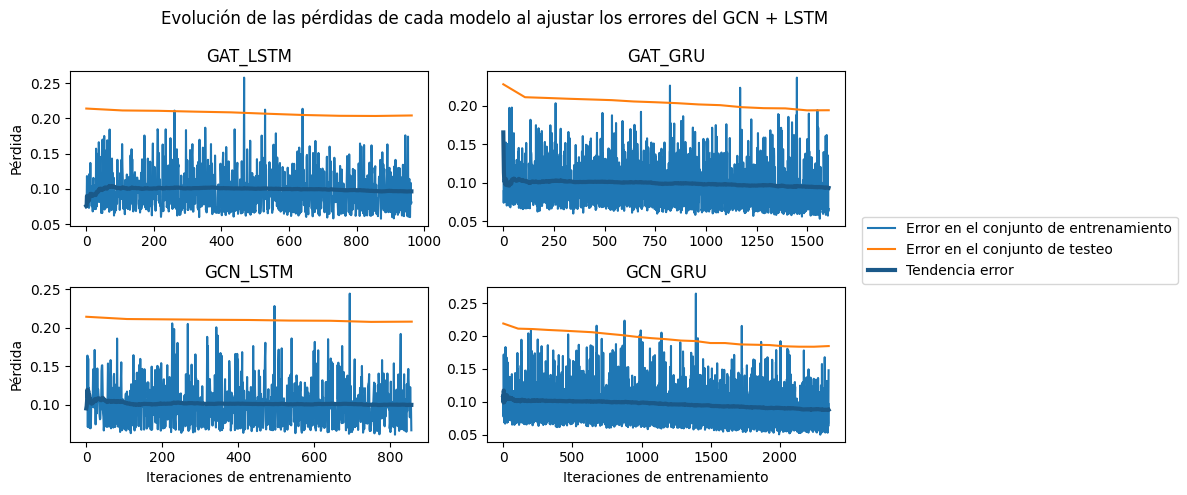

In [64]:
# Crear una figura y una matriz de subgráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

# Lista de datos y títulos para iterar
modelos = [
    (errors_gcn_lstm_lossi_gat_lstm, errors_gcn_lstm_lossi_test_gat_lstm, errors_gcn_lstm_xs_gat_lstm, "GAT_LSTM"),
    (errors_gcn_lstm_lossi_gat_gru, errors_gcn_lstm_lossi_test_gat_gru, errors_gcn_lstm_xs_gat_gru, "GAT_GRU"),
    (errors_gcn_lstm_lossi_gcn_lstm, errors_gcn_lstm_lossi_test_gcn_lstm, errors_gcn_lstm_xs_gcn_lstm, "GCN_LSTM"),
    (errors_gcn_lstm_lossi_gcn_gru, errors_gcn_lstm_lossi_test_gcn_gru, errors_gcn_lstm_xs_gcn_gru, "GCN_GRU")
]

# Lista para almacenar las líneas de los gráficos para la leyenda
lines = []
labels = []

# Iterar sobre los subgráficos y los datos
for i, (ax, (lossi, lossi_test, xs, title)) in enumerate(zip(axs.flat, modelos)):
    line1, = ax.plot(lossi, label="Error en el conjunto de entrenamiento")
    line2, = ax.plot(xs, lossi_test, label="Error en el conjunto de testeo")
    line3, = ax.plot(utils.moving_average(lossi), label="Tendencia error", lw=3, c='#1a5989')
    ax.set_title(title)

    # Condición para asignar etiquetas de los ejes
    if i // 2 == 1:  # Filas inferiores (índices 2 y 3)
        ax.set_xlabel('Iteraciones de entrenamiento')
    if i % 2 == 0:  # Columnas izquierdas (índices 0 y 2)
        ax.set_ylabel('Pérdida')

    # Solo agregar las líneas y etiquetas una vez
    if not lines:
        lines.extend([line1, line2, line3])
        labels.extend([line1.get_label(), line2.get_label(), line3.get_label()])

# Escribir titulo
fig.suptitle("Evolución de las pérdidas de cada modelo al ajustar los errores del GCN + LSTM")

# Ajustar el layout para que no haya superposición de elementos
plt.tight_layout()

# Crear una leyenda global
fig.legend(lines, labels, loc='center left', bbox_to_anchor=(0.86, 0.5))

# Ajustar los márgenes para hacer espacio para la leyenda a la derecha
plt.subplots_adjust(right=0.85)

# Mostrar la figura completa con los 4 subgráficos
plt.show()

In [65]:
# Ajustar errores del modelo GCN + GRU

In [66]:
model = torch.load("trained_models/gcn_gru.pt")
resultados_test = torch.load("trained_models/gcn_gru_outputs.pt")

model.eval()
resultados_train = []
valores_reales = []
with torch.no_grad():
  for X_batch, Y_batch in train_loader_full:
    X_batch , Y_batch = X_batch.to(device), Y_batch.to(device)
    outputs = model(X_batch, adj)
    valores_reales.append(Y_batch)
    resultados_train.append(outputs)

resultados_train = torch.cat(resultados_train, dim=0)
Y_train = torch.cat(valores_reales, dim=0)

# obtenemos los errores del modelo tanto en train como en test
errores_train = Y_train - resultados_train
errores_test = Y_test - resultados_test

In [67]:
torch.save(resultados_train, "trained_models/gcn_gru_outputs_train.pt")
torch.save(errores_train, "trained_models/gcn_gru_errores_train.pt")
torch.save(errores_test, "trained_models/gcn_gru_errores_test.pt")

In [68]:
# cargamos los data loaders para ajustar los modelos a los errores
train_loader_errores, _, _, test_loader_full_errores, _, _, _ = utils.get_data_loaders(Y_train=errores_train,
                                                                                       Y_test=errores_test)

In [69]:
# entrenamiento modelo ajustar errores de GCN + GRU con: GAT + LSTM
model = mod.GATv2_LSTM_Model()
model, lossi, lossi_test, xs, outputs = utils.train_model(model=model,
                                                          device=device,
                                                          num_epochs=30,
                                                          train_loader=train_loader_errores,
                                                          test_loader=test_loader_full_errores,
                                                          adj=adj,
                                                          lr=0.0001)

Epoch [1/30], Loss: 0.1222, Loss test: 0.1896
Epoch [2/30], Loss: 0.1030, Loss test: 0.1886
Epoch [3/30], Loss: 0.0684, Loss test: 0.1865
Epoch [4/30], Loss: 0.1276, Loss test: 0.1841
Epoch [5/30], Loss: 0.1316, Loss test: 0.1825
Epoch [6/30], Loss: 0.1147, Loss test: 0.1815
Epoch [7/30], Loss: 0.0939, Loss test: 0.1807
Epoch [8/30], Loss: 0.1256, Loss test: 0.1808
Se detectó sobreajuste: Early Stopping!!!
Última época de entrenamiento: 8


In [70]:
# guardar resultados
torch.save(model, "trained_models_errors/errors_gcn_gru/gat_lstm.pt")
torch.save(outputs, "trained_models_errors/errors_gcn_gru/gat_lstm_outputs.pt") # errores ajustados por el modelo
errors_gcn_gru_lossi_gat_lstm = lossi
errors_gcn_gru_lossi_test_gat_lstm = lossi_test
errors_gcn_gru_xs_gat_lstm = xs

In [71]:
# entrenamiento modelo ajustar errores de GCN + GRU con: GAT + GRU
model = mod.GATv2_GRU_Model()
model, lossi, lossi_test, xs, outputs = utils.train_model(model=model,
                                                          device=device,
                                                          num_epochs=30,
                                                          train_loader=train_loader_errores,
                                                          test_loader=test_loader_full_errores,
                                                          adj=adj,
                                                          lr=0.0001)

Epoch [1/30], Loss: 0.1416, Loss test: 0.1894
Epoch [2/30], Loss: 0.0816, Loss test: 0.1890
Epoch [3/30], Loss: 0.0852, Loss test: 0.1883
Epoch [4/30], Loss: 0.1868, Loss test: 0.1878
Epoch [5/30], Loss: 0.1064, Loss test: 0.1872
Epoch [6/30], Loss: 0.0624, Loss test: 0.1876
Se detectó sobreajuste: Early Stopping!!!
Última época de entrenamiento: 6


In [72]:
# guardar resultados
torch.save(model, "trained_models_errors/errors_gcn_gru/gat_gru.pt")
torch.save(outputs, "trained_models_errors/errors_gcn_gru/gat_gru_outputs.pt") # errores ajustados por el modelo
errors_gcn_gru_lossi_gat_gru = lossi
errors_gcn_gru_lossi_test_gat_gru = lossi_test
errors_gcn_gru_xs_gat_gru = xs

In [73]:
# entrenamiento modelo ajustar errores de GCN + GRU con: GCN + LSTM
model = mod.GCN_LSTM_Model()
model, lossi, lossi_test, xs, outputs = utils.train_model(model=model,
                                                          device=device,
                                                          num_epochs=30,
                                                          train_loader=train_loader_errores,
                                                          test_loader=test_loader_full_errores,
                                                          adj=adj,
                                                          lr=0.0001)

Epoch [1/30], Loss: 0.1051, Loss test: 0.1894
Epoch [2/30], Loss: 0.0711, Loss test: 0.1886
Epoch [3/30], Loss: 0.0739, Loss test: 0.1870
Epoch [4/30], Loss: 0.0767, Loss test: 0.1847
Epoch [5/30], Loss: 0.1549, Loss test: 0.1835
Epoch [6/30], Loss: 0.0991, Loss test: 0.1822
Epoch [7/30], Loss: 0.0937, Loss test: 0.1831
Se detectó sobreajuste: Early Stopping!!!
Última época de entrenamiento: 7


In [74]:
# guardar resultados
torch.save(model, "trained_models_errors/errors_gcn_gru/gcn_lstm.pt")
torch.save(outputs, "trained_models_errors/errors_gcn_gru/gcn_lstm_outputs.pt") # errores ajustados por el modelo
errors_gcn_gru_lossi_gcn_lstm = lossi
errors_gcn_gru_lossi_test_gcn_lstm = lossi_test
errors_gcn_gru_xs_gcn_lstm = xs

In [75]:
# entrenamiento modelo ajustar errores de GCN + GRU con: GCN + GRU
model = mod.GCN_GRU_Model()
model, lossi, lossi_test, xs, outputs = utils.train_model(model=model,
                                                          device=device,
                                                          num_epochs=30,
                                                          train_loader=train_loader_errores,
                                                          test_loader=test_loader_full_errores,
                                                          adj=adj,
                                                          lr=0.0001)

Epoch [1/30], Loss: 0.0920, Loss test: 0.1885
Epoch [2/30], Loss: 0.1026, Loss test: 0.1874
Epoch [3/30], Loss: 0.1526, Loss test: 0.1864
Epoch [4/30], Loss: 0.0810, Loss test: 0.1851
Epoch [5/30], Loss: 0.1112, Loss test: 0.1837
Epoch [6/30], Loss: 0.0991, Loss test: 0.1815
Epoch [7/30], Loss: 0.1252, Loss test: 0.1801
Epoch [8/30], Loss: 0.1332, Loss test: 0.1773
Epoch [9/30], Loss: 0.0689, Loss test: 0.1758
Epoch [10/30], Loss: 0.0960, Loss test: 0.1737
Epoch [11/30], Loss: 0.0753, Loss test: 0.1721
Epoch [12/30], Loss: 0.1346, Loss test: 0.1705
Epoch [13/30], Loss: 0.0897, Loss test: 0.1702
Epoch [14/30], Loss: 0.0943, Loss test: 0.1691
Epoch [15/30], Loss: 0.0843, Loss test: 0.1671
Epoch [16/30], Loss: 0.0959, Loss test: 0.1671
Se detectó sobreajuste: Early Stopping!!!
Última época de entrenamiento: 16


In [76]:
# guardar resultados
torch.save(model, "trained_models_errors/errors_gcn_gru/gcn_gru.pt")
torch.save(outputs, "trained_models_errors/errors_gcn_gru/gcn_gru_outputs.pt") # errores ajustados por el modelo
errors_gcn_gru_lossi_gcn_gru = lossi
errors_gcn_gru_lossi_test_gcn_gru = lossi_test
errors_gcn_gru_xs_gcn_gru = xs

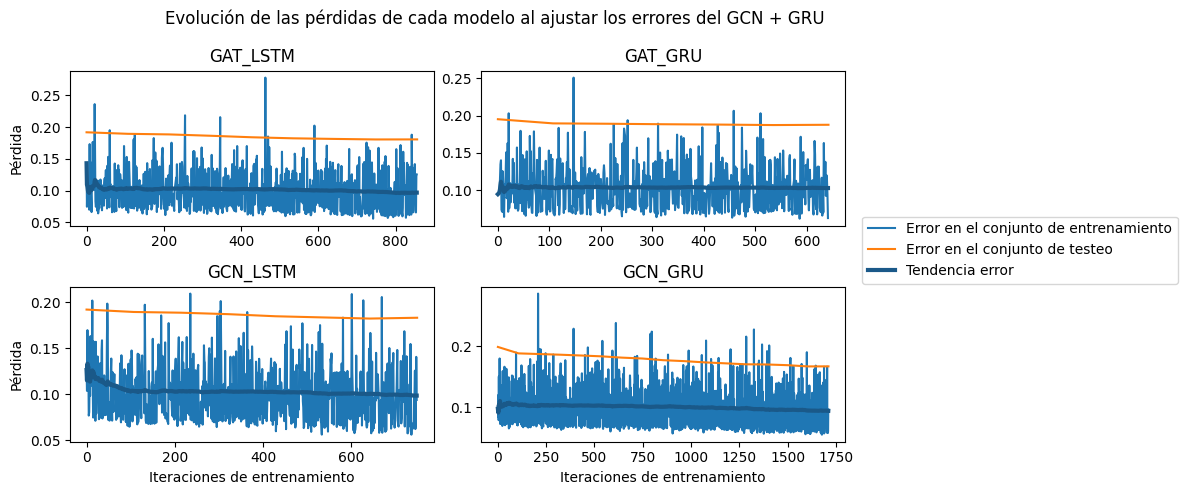

In [77]:
# Crear una figura y una matriz de subgráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

# Lista de datos y títulos para iterar
modelos = [
    (errors_gcn_gru_lossi_gat_lstm, errors_gcn_gru_lossi_test_gat_lstm, errors_gcn_gru_xs_gat_lstm, "GAT_LSTM"),
    (errors_gcn_gru_lossi_gat_gru, errors_gcn_gru_lossi_test_gat_gru, errors_gcn_gru_xs_gat_gru, "GAT_GRU"),
    (errors_gcn_gru_lossi_gcn_lstm, errors_gcn_gru_lossi_test_gcn_lstm, errors_gcn_gru_xs_gcn_lstm, "GCN_LSTM"),
    (errors_gcn_gru_lossi_gcn_gru, errors_gcn_gru_lossi_test_gcn_gru, errors_gcn_gru_xs_gcn_gru, "GCN_GRU")
]

# Lista para almacenar las líneas de los gráficos para la leyenda
lines = []
labels = []

# Iterar sobre los subgráficos y los datos
for i, (ax, (lossi, lossi_test, xs, title)) in enumerate(zip(axs.flat, modelos)):
    line1, = ax.plot(lossi, label="Error en el conjunto de entrenamiento")
    line2, = ax.plot(xs, lossi_test, label="Error en el conjunto de testeo")
    line3, = ax.plot(utils.moving_average(lossi), label="Tendencia error", lw=3, c='#1a5989')
    ax.set_title(title)

    # Condición para asignar etiquetas de los ejes
    if i // 2 == 1:  # Filas inferiores (índices 2 y 3)
        ax.set_xlabel('Iteraciones de entrenamiento')
    if i % 2 == 0:  # Columnas izquierdas (índices 0 y 2)
        ax.set_ylabel('Pérdida')

    # Solo agregar las líneas y etiquetas una vez
    if not lines:
        lines.extend([line1, line2, line3])
        labels.extend([line1.get_label(), line2.get_label(), line3.get_label()])

# Escribir titulo
fig.suptitle("Evolución de las pérdidas de cada modelo al ajustar los errores del GCN + GRU")

# Ajustar el layout para que no haya superposición de elementos
plt.tight_layout()

# Crear una leyenda global
fig.legend(lines, labels, loc='center left', bbox_to_anchor=(0.86, 0.5))

# Ajustar los márgenes para hacer espacio para la leyenda a la derecha
plt.subplots_adjust(right=0.85)

# Mostrar la figura completa con los 4 subgráficos
plt.show()

In [78]:
# Realizar el Boosting

In [89]:
# Para el modelo GAT + LSTM:

# ajustar errores con GAT + LSTM
errores_ajustados = torch.load("trained_models_errors/errors_gat_lstm/gat_lstm_outputs.pt")
predic_final = outputs_gat_lstm + errores_ajustados
res['Modelos'].append("GAT_LSTM_boost_con_GAT_LSTM")
res['Test loss'].append(criterion(predic_final, Y_test).item())

# ajustar errores con GAT + GRU
errores_ajustados = torch.load("trained_models_errors/errors_gat_lstm/gat_gru_outputs.pt")
predic_final = outputs_gat_lstm + errores_ajustados
res['Modelos'].append("GAT_LSTM_boost_con_GAT_GRU")
res['Test loss'].append(criterion(predic_final, Y_test).item())

# ajustar errores con GCN + LSTM
errores_ajustados = torch.load("trained_models_errors/errors_gat_lstm/gcn_lstm_outputs.pt")
predic_final = outputs_gat_lstm + errores_ajustados
res['Modelos'].append("GAT_LSTM_boost_con_GCN_LSTM")
res['Test loss'].append(criterion(predic_final, Y_test).item())

# ajustar errores con GCN + GRU
errores_ajustados = torch.load("trained_models_errors/errors_gat_lstm/gcn_gru_outputs.pt")
predic_final = outputs_gat_lstm + errores_ajustados
res['Modelos'].append("GAT_LSTM_boost_con_GCN_GRU")
res['Test loss'].append(criterion(predic_final, Y_test).item())

In [90]:
# Para el modelo GAT + GRU:

# ajustar errores con GAT + LSTM
errores_ajustados = torch.load("trained_models_errors/errors_gat_gru/gat_lstm_outputs.pt")
predic_final = outputs_gat_gru + errores_ajustados
res['Modelos'].append("GAT_GRU_boost_con_GAT_LSTM")
res['Test loss'].append(criterion(predic_final, Y_test).item())


# ajustar errores con GAT + GRU
errores_ajustados = torch.load("trained_models_errors/errors_gat_gru/gat_gru_outputs.pt")
predic_final = outputs_gat_gru + errores_ajustados
res['Modelos'].append("GAT_GRU_boost_con_GAT_GRU")
res['Test loss'].append(criterion(predic_final, Y_test).item())


# ajustar errores con GCN + LSTM
errores_ajustados = torch.load("trained_models_errors/errors_gat_gru/gcn_lstm_outputs.pt")
predic_final = outputs_gat_gru + errores_ajustados
res['Modelos'].append("GAT_GRU_boost_con_GCN_LSTM")
res['Test loss'].append(criterion(predic_final, Y_test).item())


# ajustar errores con GCN + GRU
errores_ajustados = torch.load("trained_models_errors/errors_gat_gru/gcn_gru_outputs.pt")
predic_final = outputs_gat_gru + errores_ajustados
res['Modelos'].append("GAT_GRU_boost_con_GCN_GRU")
res['Test loss'].append(criterion(predic_final, Y_test).item())



In [91]:
# Para el modelo GCN + LSTM:

# ajustar errores con GAT + LSTM
errores_ajustados = torch.load("trained_models_errors/errors_gcn_lstm/gat_lstm_outputs.pt")
predic_final = outputs_gcn_lstm + errores_ajustados
res['Modelos'].append("GCN_LSTM_boost_con_GAT_LSTM")
res['Test loss'].append(criterion(predic_final, Y_test).item())

# ajustar errores con GAT + GRU
errores_ajustados = torch.load("trained_models_errors/errors_gcn_lstm/gat_gru_outputs.pt")
predic_final = outputs_gcn_lstm + errores_ajustados
res['Modelos'].append("GCN_LSTM_boost_con_GAT_GRU")
res['Test loss'].append(criterion(predic_final, Y_test).item())

# ajustar errores con GCN + LSTM
errores_ajustados = torch.load("trained_models_errors/errors_gcn_lstm/gcn_lstm_outputs.pt")
predic_final = outputs_gcn_lstm + errores_ajustados
res['Modelos'].append("GCN_LSTM_boost_con_GCN_LSTM")
res['Test loss'].append(criterion(predic_final, Y_test).item())

# ajustar errores con GCN + GRU
errores_ajustados = torch.load("trained_models_errors/errors_gcn_lstm/gcn_gru_outputs.pt")
predic_final = outputs_gcn_lstm + errores_ajustados
res['Modelos'].append("GCN_LSTM_boost_con_GCN_GRU")
res['Test loss'].append(criterion(predic_final, Y_test).item())

In [92]:
# Para el modelo GCN + GRU:

# ajustar errores con GAT + LSTM
errores_ajustados = torch.load("trained_models_errors/errors_gcn_gru/gat_lstm_outputs.pt")
predic_final = outputs_gcn_gru + errores_ajustados
res['Modelos'].append("GCN_GRU_boost_con_GAT_LSTM")
res['Test loss'].append(criterion(predic_final, Y_test).item())

# ajustar errores con GAT + GRU
errores_ajustados = torch.load("trained_models_errors/errors_gcn_gru/gat_gru_outputs.pt")
predic_final = outputs_gcn_gru + errores_ajustados
res['Modelos'].append("GCN_GRU_boost_con_GAT_GRU")
res['Test loss'].append(criterion(predic_final, Y_test).item())

# ajustar errores con GCN + LSTM
errores_ajustados = torch.load("trained_models_errors/errors_gcn_gru/gcn_lstm_outputs.pt")
predic_final = outputs_gcn_gru + errores_ajustados
res['Modelos'].append("GCN_GRU_boost_con_GCN_LSTM")
res['Test loss'].append(criterion(predic_final, Y_test).item())

# ajustar errores con GCN + GRU
errores_ajustados = torch.load("trained_models_errors/errors_gcn_gru/gcn_gru_outputs.pt")
predic_final = outputs_gcn_gru + errores_ajustados
res['Modelos'].append("GCN_GRU_boost_con_GCN_GRU")
res['Test loss'].append(criterion(predic_final, Y_test).item())

In [94]:
df = pd.DataFrame(res)
df.sort_values('Test loss')

,Modelos,Test loss
30,GCN_GRU_boost_con_GCN_GRU,0.167142
22,GAT_GRU_boost_con_GCN_GRU,0.175168
27,GCN_GRU_boost_con_GAT_LSTM,0.180763
29,GCN_GRU_boost_con_GCN_LSTM,0.183125
18,GAT_LSTM_boost_con_GCN_GRU,0.183149
26,GCN_LSTM_boost_con_GCN_GRU,0.184584
28,GCN_GRU_boost_con_GAT_GRU,0.187567
12,"(GAT + LSTM, GAT + GRU, GCN + GRU)",0.187708
9,"(GAT + GRU, GCN + GRU)",0.188496
14,"(GAT + LSTM, GCN + LSTM, GAT + GRU, GCN + GRU)",0.189863


In [99]:
df.to_excel("Resultados_obtenidos.xlsx")